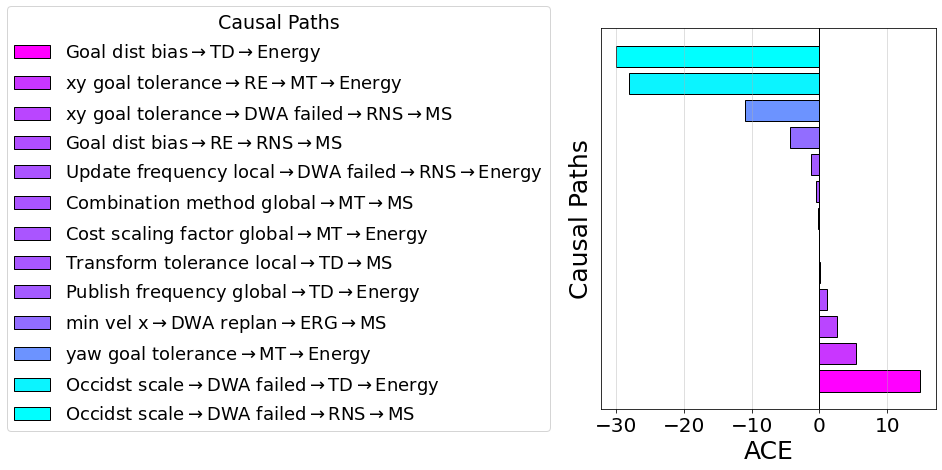

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import ScalarMappable

ce_energy = pd.read_csv('ce_rank.csv', names=["ACE", "Ql", "Qu", "Config", "paths"]) 

ce_ace = ce_energy["ACE"]
ce_ql = ce_energy["Ql"]
ce_qu = ce_energy["Qu"]
ace_error = (ce_qu + ce_ql)/4

ce_config = ce_energy["Config"]
x = range(0,13)

my_cmap = plt.get_cmap("cool")
rescale = lambda ce_ace: (ce_ace - np.min(ce_ace)) / (np.max(ce_ace) - np.min(ce_ace))

plt.rcParams.update({'figure.figsize':(6,7)})
bar = plt.barh(x, ce_ace,
                edgecolor = 'k',
                color=my_cmap(rescale(ce_ace))) 
plt.axvline(linewidth=1, color='k')
# plt.errorbar(ce_ace, x, xerr=ace_error, capsize=10, fmt="x", color="b")               

labelsize = 20
fontsize = 25
# plt.xticks(ce_ace)
# plt.xticks(rotation='vertical')
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize)
plt.yticks([])
plt.xlabel("ACE", fontsize=fontsize)
plt.ylabel("Causal Paths", fontsize=fontsize)
plt.legend(bar, [r'$ \mathrm{Goal\ dist\ bias} \rightarrow \mathrm{TD} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{xy\ goal\ tolerance} \rightarrow \mathrm{RE} \rightarrow \mathrm{MT} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{xy\ goal\ tolerance} \rightarrow \mathrm{DWA\ failed} \rightarrow \mathrm{RNS} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{Goal\ dist\ bias} \rightarrow \mathrm{RE} \rightarrow \mathrm{RNS} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{Update\ frequency\ local} \rightarrow \mathrm{DWA\ failed} \rightarrow \mathrm{RNS} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{Combination\ method\ global} \rightarrow \mathrm{MT} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{Cost\ scaling\ factor\ global} \rightarrow \mathrm{MT} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{Transform\ tolerance\ local} \rightarrow \mathrm{TD} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{Publish\ frequency\ global} \rightarrow \mathrm{TD} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{min\ vel\ x} \rightarrow \mathrm{DWA\ replan} \rightarrow \mathrm{ERG} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{yaw\ goal\ tolerance} \rightarrow \mathrm{MT} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{Occidst\ scale} \rightarrow \mathrm{DWA\ failed} \rightarrow \mathrm{TD} \rightarrow \mathrm{Energy}$', 
                 r'$ \mathrm{Occidst\ scale} \rightarrow \mathrm{DWA\ failed} \rightarrow \mathrm{RNS} \rightarrow \mathrm{MS}$'],                 
                 title='Causal Paths', title_fontsize=19,
                 fontsize=18,
                 loc='center left', bbox_to_anchor=(-1.8, 0.5))
plt.grid(axis='x', alpha=0.5)                 
plt.savefig('fig/path_ACE.pdf', dpi=100, bbox_inches='tight')
plt.show()

### Validation

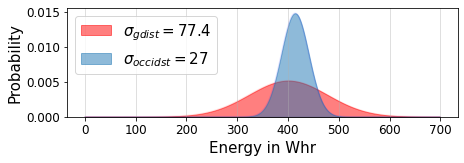

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.stats import norm

df = pd.read_csv("ce_validation.csv")

energy_gdist = df["Battery_percentage_goal_dist_bia(Wh)"]
energy_occdist = df["Battery_percentage_occdist_scale(Wh)"]

mean_gdist = statistics.mean(energy_gdist)
std_gdist = statistics.stdev(energy_gdist)

mean_occdist = statistics.mean(energy_occdist)
std_occdist = statistics.stdev(energy_occdist)

x = range(700)

gdist = norm.pdf(x, mean_gdist, std_gdist)
occdist = norm.pdf(x, mean_occdist, std_occdist)

plt.rcParams.update({'figure.figsize':(7,2)})

plt.plot(x, gdist, color='r', alpha=0.1)
plt.plot(x, occdist, color='b', alpha=0.1)
plt.fill_between(x, gdist, color='r', alpha=0.5, label=r'$\sigma_{gdist}=77.4$')
plt.fill_between(x, occdist, color='C0', alpha=0.5, label=r'$\sigma_{occidst}=27$')

plt.ylim(bottom=0)


labelsize = 12
fontsize = 15
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize)
plt.xlabel("Energy in Whr", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.grid(axis='x', alpha=0.5) 
plt.legend(fontsize=15)
plt.savefig('ce_validation.pdf', dpi=500, bbox_inches='tight')
plt.show()

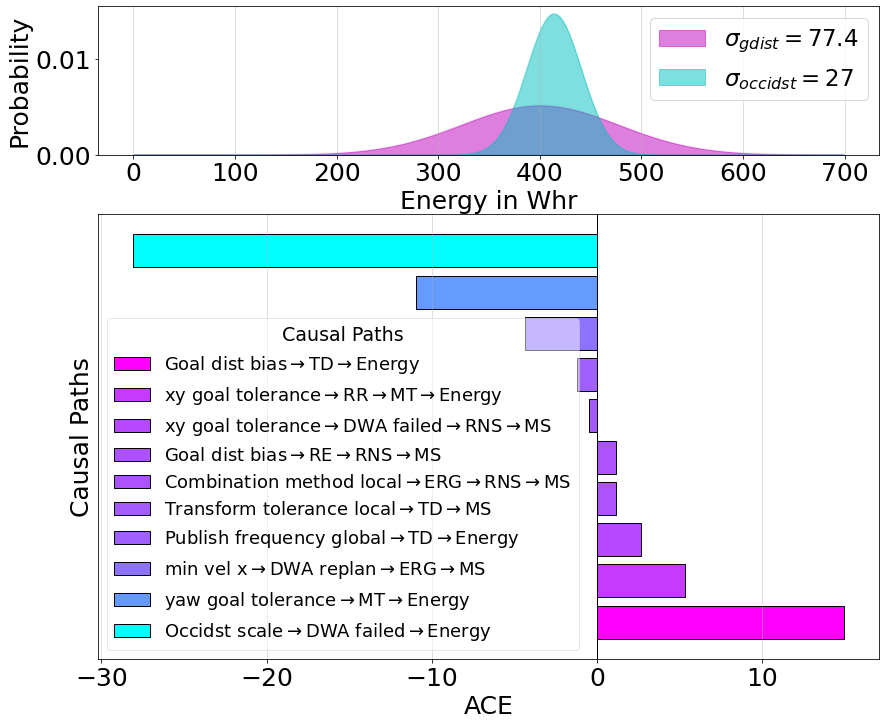

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import ScalarMappable
import statistics
from scipy.stats import norm


#### Causal paths
ce_energy = pd.read_csv('ce_rank.csv', names=["ACE", "Ql", "Qu", "Config", "paths"]) 

ce_ace = ce_energy["ACE"]
ce_ql = ce_energy["Ql"]
ce_qu = ce_energy["Qu"]
ace_error = (ce_qu + ce_ql)/4

ce_config = ce_energy["Config"]
x1 = range(0,10)

my_cmap = plt.get_cmap("cool")
rescale = lambda ce_ace: (ce_ace - np.min(ce_ace)) / (np.max(ce_ace) - np.min(ce_ace))

#########################################################################################

### Validation
df = pd.read_csv("ce_validation.csv")

energy_gdist = df["Battery_percentage_goal_dist_bia(Wh)"]
energy_occdist = df["Battery_percentage_occdist_scale(Wh)"]

mean_gdist = statistics.mean(energy_gdist)
std_gdist = statistics.stdev(energy_gdist)

mean_occdist = statistics.mean(energy_occdist)
std_occdist = statistics.stdev(energy_occdist)

x2 = range(700)

gdist = norm.pdf(x2, mean_gdist, std_gdist)
occdist = norm.pdf(x2, mean_occdist, std_occdist)
##########################################################################################


fig, axs = plt.subplots(2,1,figsize=(14,12), gridspec_kw={'height_ratios': [1, 3]})


#### top fig
axs[0].plot(x2, gdist, color='m', alpha=0.1)
axs[0].plot(x2, occdist, color='c', alpha=0.1)
axs[0].fill_between(x2, gdist, color='m', alpha=0.5, label=r'$\sigma_{gdist}=77.4$')
axs[0].fill_between(x2, occdist, color='c', alpha=0.5, label=r'$\sigma_{occidst}=27$')

axs[0].set_ylim(bottom=0)


##### bottom fig
bar = axs[1].barh(x1, ce_ace,
                edgecolor = 'k',
                color=my_cmap(rescale(ce_ace))) 
axs[1].axvline(linewidth=1, color='k')


labelsize = 25
fontsize = 25
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize)

axs[0].set_xlabel("Energy in Whr", fontsize=fontsize)
axs[0].set_ylabel("Probability", fontsize=fontsize)
axs[0].grid(axis='x', alpha=0.5) 
axs[0].legend(fontsize=23)

axs[1].set_yticks([])
axs[1].set_xlabel("ACE", fontsize=fontsize)
axs[1].set_ylabel("Causal Paths", fontsize=fontsize)
axs[1].legend(bar, [r'$ \mathrm{Goal\ dist\ bias} \rightarrow \mathrm{TD} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{xy\ goal\ tolerance} \rightarrow \mathrm{RR} \rightarrow \mathrm{MT} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{xy\ goal\ tolerance} \rightarrow \mathrm{DWA\ failed} \rightarrow \mathrm{RNS} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{Goal\ dist\ bias} \rightarrow \mathrm{RE} \rightarrow \mathrm{RNS} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{Combination\ method\ local} \rightarrow \mathrm{ERG} \rightarrow \mathrm{RNS} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{Transform\ tolerance\ local} \rightarrow \mathrm{TD} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{Publish\ frequency\ global} \rightarrow \mathrm{TD} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{min\ vel\ x} \rightarrow \mathrm{DWA\ replan} \rightarrow \mathrm{ERG} \rightarrow \mathrm{MS}$',
                 r'$ \mathrm{yaw\ goal\ tolerance} \rightarrow \mathrm{MT} \rightarrow \mathrm{Energy}$',
                 r'$ \mathrm{Occidst\ scale} \rightarrow \mathrm{DWA\ failed} \rightarrow \mathrm{Energy}$'],                 
                 title='Causal Paths', title_fontsize=19,
                 fontsize=18, framealpha=0.5,
                 loc='lower left')
axs[1].grid(axis='x', alpha=0.5) 

plt.savefig('ce_paths.pdf', dpi=500, bbox_inches='tight')
plt.show()


### Inference

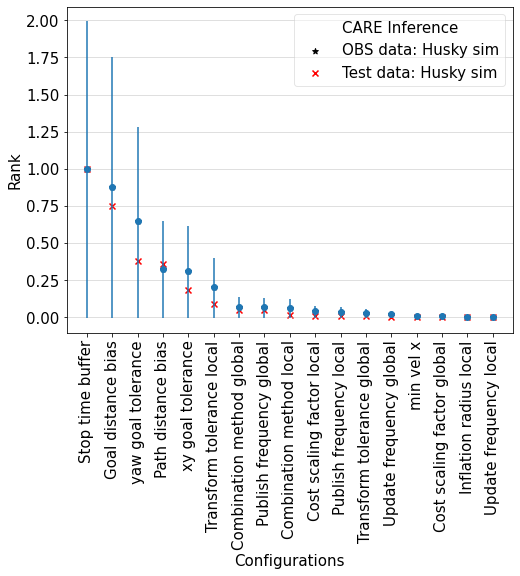

In [31]:
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import numpy as np

inf_result_test_husky = pd.read_csv("care_inference_test.csv", names=["Config", "ACE", "Ql", "Qu"])
inf_result_train_husky = pd.read_csv("care_inference_train.csv", names=["Config", "ACE", "Ql", "Qu"])
inf_result_test_turtlebot = pd.read_csv("care_inference_test_turtlebot_phy.csv", names=["Config", "ACE", "Ql", "Qu"])

config = inf_result_train_husky["Config"]

ACE_train = inf_result_train_husky["ACE"]
Ql_train = inf_result_train_husky["Ql"]
Qu_train = inf_result_train_husky["Qu"]
rank_train = (ACE_train - np.min(ACE_train)) / (np.max(ACE_train) - np.min(ACE_train))
rank_ql_train = statistics.mean((Ql_train - np.min(Ql_train)) / (np.max(Ql_train) - np.min(Ql_train)))
rank_qu_train = statistics.mean((Qu_train - np.min(Qu_train)) / (np.max(Qu_train) - np.min(Qu_train)))
rank_err_train = (rank_qu_train + rank_qu_train) / 100

ACE_test = inf_result_test_husky["ACE"]
Ql_test = inf_result_test_husky["Ql"]
Qu_test = inf_result_test_husky["Qu"]
rank_test = (ACE_test - np.min(ACE_test)) / (np.max(ACE_test) - np.min(ACE_test))
rank_ql_test = statistics.mean((Ql_test - np.min(Ql_test)) / (np.max(Ql_test) - np.min(Ql_test)))
rank_qu_test = statistics.mean((Qu_test - np.min(Qu_test)) / (np.max(Qu_test) - np.min(Qu_test)))
rank_err_test = (rank_qu_test + rank_ql_test) / 10

# ACE_test_t = inf_result_test_turtlebot["ACE"]
# Ql_test_t = inf_result_test_turtlebot["Ql"]
# Qu_test_t = inf_result_test_turtlebot["Qu"]
# rank_test_t = (ACE_test_t - np.min(ACE_test_t)) / (np.max(ACE_test_t) - np.min(ACE_test_t)) + 0.3
# rank_ql_test_t = (Ql_test_t - np.min(Ql_test_t)) / (np.max(Ql_test_t) - np.min(Ql_test_t)) + 0.3
# rank_qu_test_t = (Qu_test_t - np.min(Qu_test_t)) / (np.max(Qu_test_t) - np.min(Qu_test_t)) + 0.3
# rank_err_test_t = (rank_qu_test_t + rank_qu_test_t) / 5

# c = [r'$C_1$', r'$C_2$', r'$C_3$', r'$C_4$', r'$C_5$', r'$C_6$', r'$C_7$', r'$C_8$', r'$C_9$', r'$C_{10}$', r'$C_{11}$', r'$C_{12}$', r'$C_{13}$', r'$C_{14}$', r'$C_{15}$', r'$C_{16}$', r'$C_{17}$']
# c = ['Gdist bias', 'xy goal tolerance', 'Combination method', 'Cost scaling factor local', 'Publish freqency local', 'min vel x', 'Inflation radius local',
#     'Update frequency local', 'Cost scaling factor global', 'Update frequency global', 'Transform tolerance global', 'Publish frequency global', 'Combination method global',
#     'Transform tolerance local', 'Pdist bias', 'yaw goal tolerance', 'Stop time buffer']

plt.rcParams.update({'figure.figsize':(8,6)})

plt.scatter(config, rank_train, color = 'k', marker='*', label='OBS data: Husky sim')
plt.errorbar(config, rank_train, yerr=[rank_train+rank_err_train, rank_train-rank_err_train], fmt="o")
#plt.fill_between(config, rank_train+rank_err_train, rank_train-rank_err_train,  color = 'k', alpha = 0.3)

plt.scatter(config, rank_test, color = 'red', marker='x', label='Test data: Husky sim')
#plt.fill_between(config, rank_test+rank_err_test, rank_test-rank_err_test, color = 'red', alpha = 0.2)

# plt.plot(c, rank_test_t, color = 'b', marker='x', label='Test data: Turtlebot hardware')
# plt.fill_between(c, rank_qu_test_t, rank_ql_test_t, color = 'b', alpha = 0.2)

labelsize = 15
fontsize = 25
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize)

plt.xticks(rotation=90)
plt.xlabel("Configurations", fontsize=15)
plt.ylabel("Rank", fontsize=15)
plt.legend(prop={'size': 15}, loc='upper right',  title='CARE Inference', title_fontsize=15, framealpha=0.5)
plt.grid(axis='y', alpha=0.5) 

plt.savefig('care_inference.pdf', dpi=500, bbox_inches='tight') 
plt.show()


Cost scaling factor global


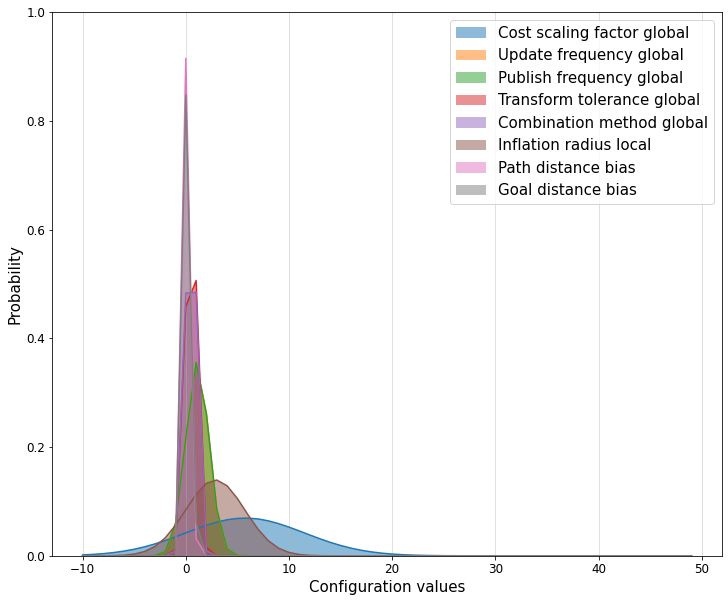

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.stats import norm

df = pd.read_csv("data_dist.csv")

def data_dist(config: str):
    x = range(-10, 50)
    mean = statistics.stdev(df[config])
    std = statistics.stdev(df[config])
    norm_config = norm.pdf(x, mean, std)
    plt.plot(x, norm_config)
    plt.fill_between(x, norm_config, alpha=0.5, label=config)


plt.rcParams.update({'figure.figsize':(12,10)})

for config in range(len(df.columns)):
    data_dist(df.columns[config])
# data_dist("Update_frequency_global")
# data_dist("Publish_frequency_global")
# data_dist("Transform_tolerance_global")
print(df.columns[0])

plt.ylim(bottom=0)
plt.ylim(0,1)
labelsize = 12
fontsize = 15
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize)
plt.xlabel("Configuration values", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.grid(axis='x', alpha=0.5) 
plt.legend(fontsize=15)
# plt.savefig('ce_validation.pdf', dpi=500, bbox_inches='tight')
plt.show()